This notebook shows the code used to create Figures 1,4,5 and 6. 

In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from spatial_analysis import get_clusters_swiss
from epigraphhub.analysis.clustering import lag_ccf

Getting the data of cases of covid-19 by canton in Switzerland: 

In [4]:
cases = pd.read_csv('data_article/cases_swiss.csv')
cases.set_index('datum', inplace = True)
cases.index = pd.to_datetime(cases.index)
cases

,georegion,entries
datum,,
2020-02-28,CH,10
2020-02-29,CH,13
2021-09-05,NW,9
2020-03-01,CH,12
2022-05-14,GE,68
...,...,...
2021-11-14,VD,124
2021-11-15,VD,339
2020-09-24,UR,0


**In all the analyses below, we use the cases reported up `2022-06-30`.** 

Plotting the Figure 1: The time series of cases of covid-19 by canton 

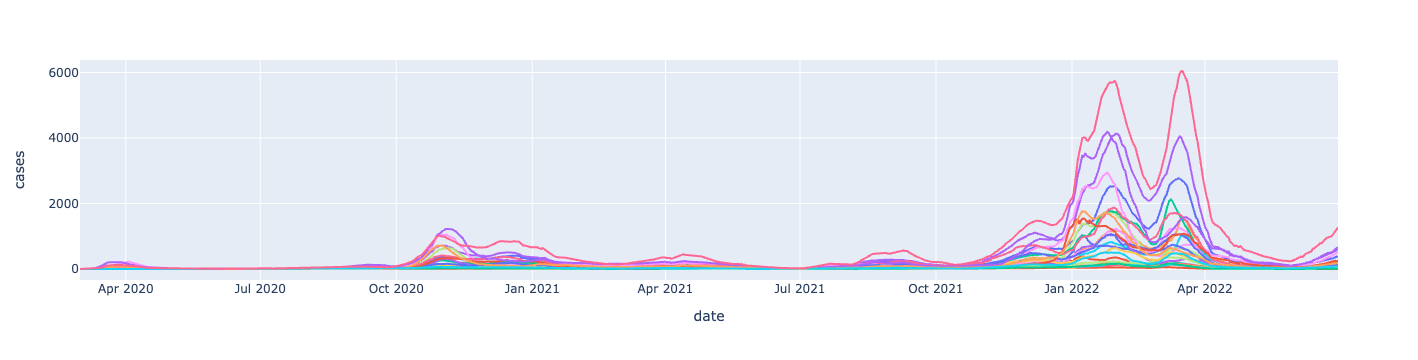

In [11]:
inc_canton = cases.pivot(columns='georegion', values='entries')
del inc_canton['CHFL']
del inc_canton['CH']

fig=px.line(inc_canton.rolling(7).mean().dropna(),render_mode="SVG")
fig.update_layout(xaxis_title='date',
                  yaxis_title='cases',
                  #title = f'Case series for all cantons'
)

fig.layout.update(showlegend=False) # if you want to show the legend 

fig.write_image('plots/canton_series.png', scale=3) 

fig.show()

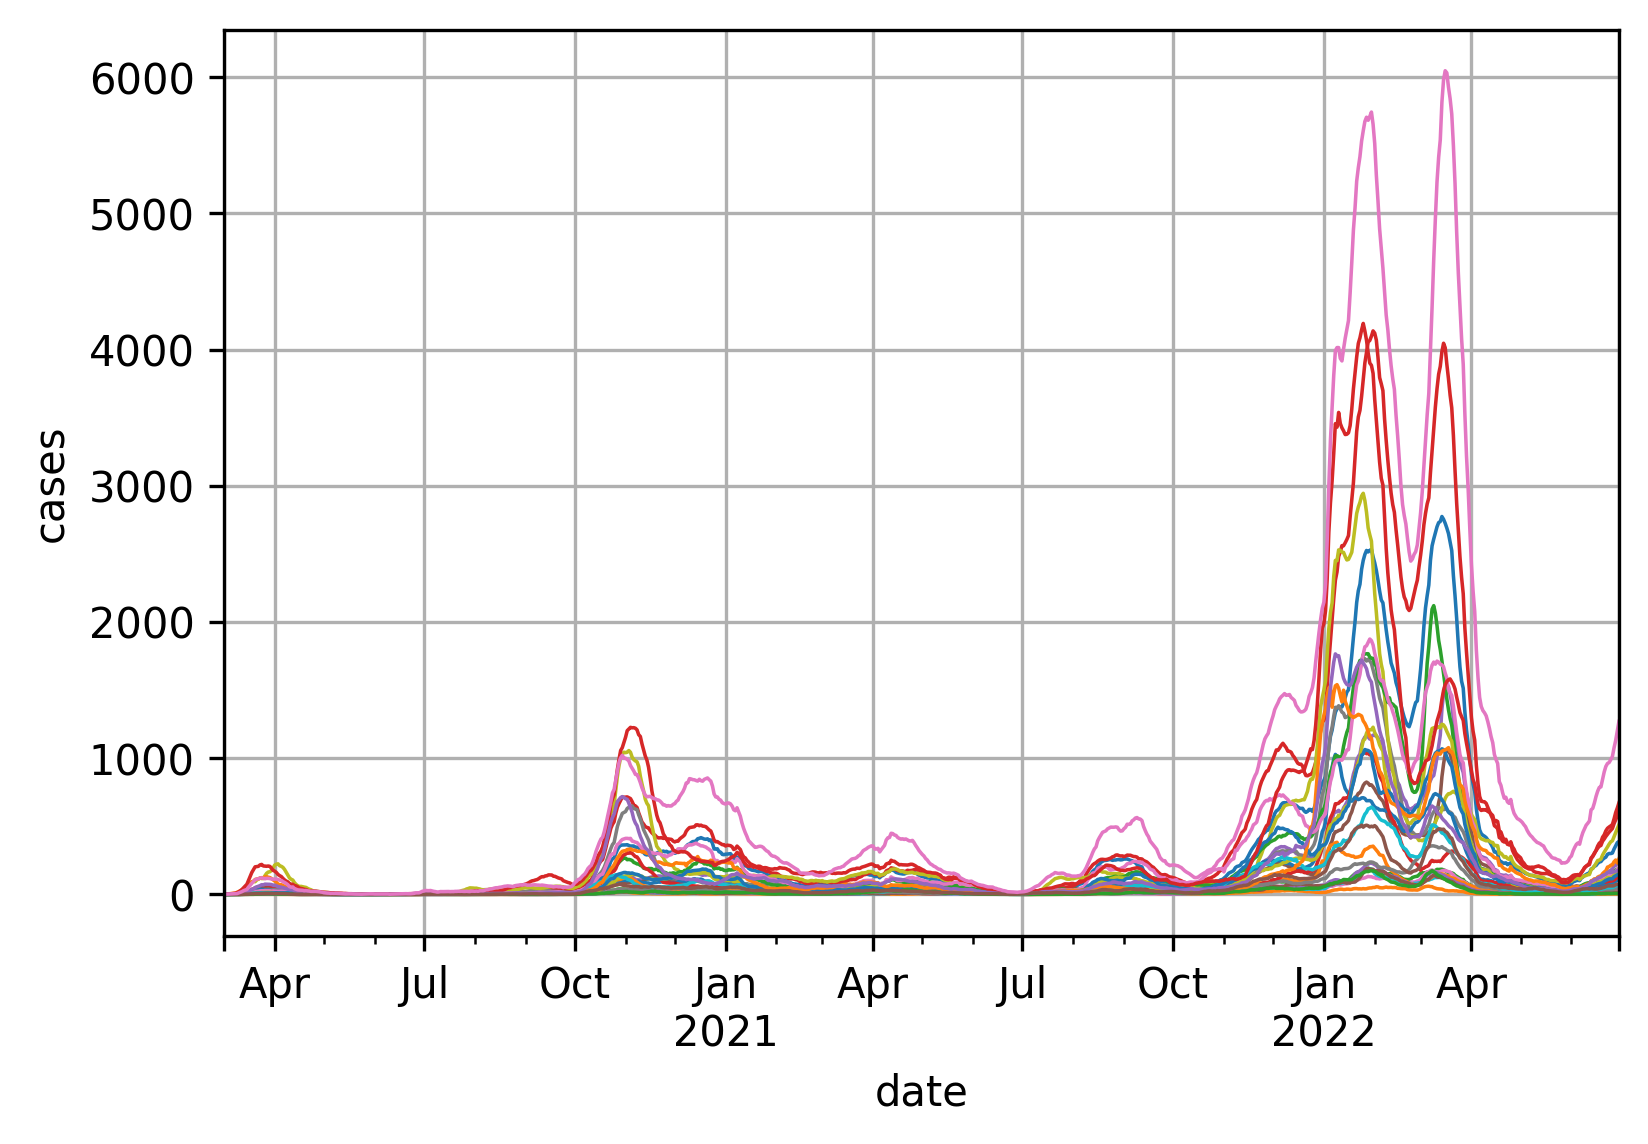

In [6]:
plt.rcParams['figure.dpi'] = 300

ax = inc_canton.rolling(7).mean().dropna().plot(lw = 0.85, grid = True, legend = False)

fig = ax.get_figure()

ax.set_xlabel('date')

ax.set_ylabel('cases')

ax.figure.savefig('plots/canton_series_plt.png', dpi=300, bbox_inches = 'tight')

Plotting Figures 4 (matrix of correlation) and 5 (matrix of lags) between the time series of cases by canton:

In [8]:
cm,lm=lag_ccf(inc_canton.values)

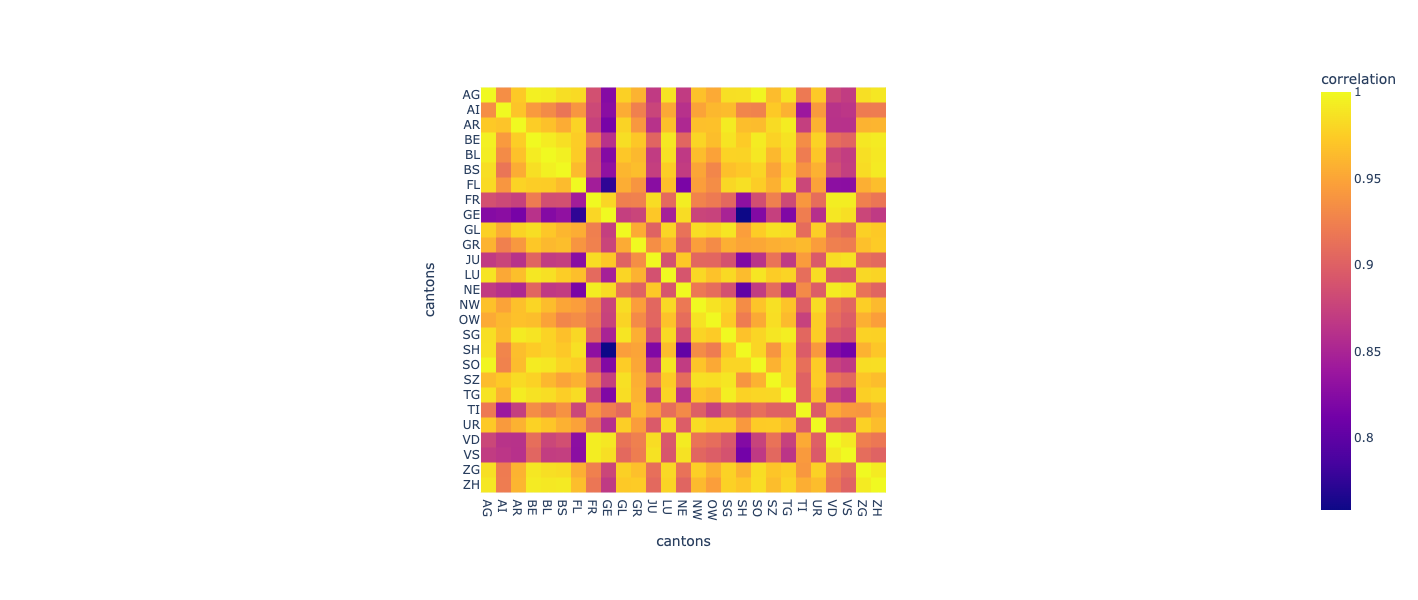

In [9]:
fig = px.imshow(cm,
          labels=dict(x="cantons", y="cantons", color="correlation"),
          x=inc_canton.columns,
          y=inc_canton.columns,
          # title='Cross-correlation Matrix'
         )
fig.update_layout(width=600,height=600)
fig.write_image('plots/Cross-corr_matrix.png', scale=3)
fig.show()

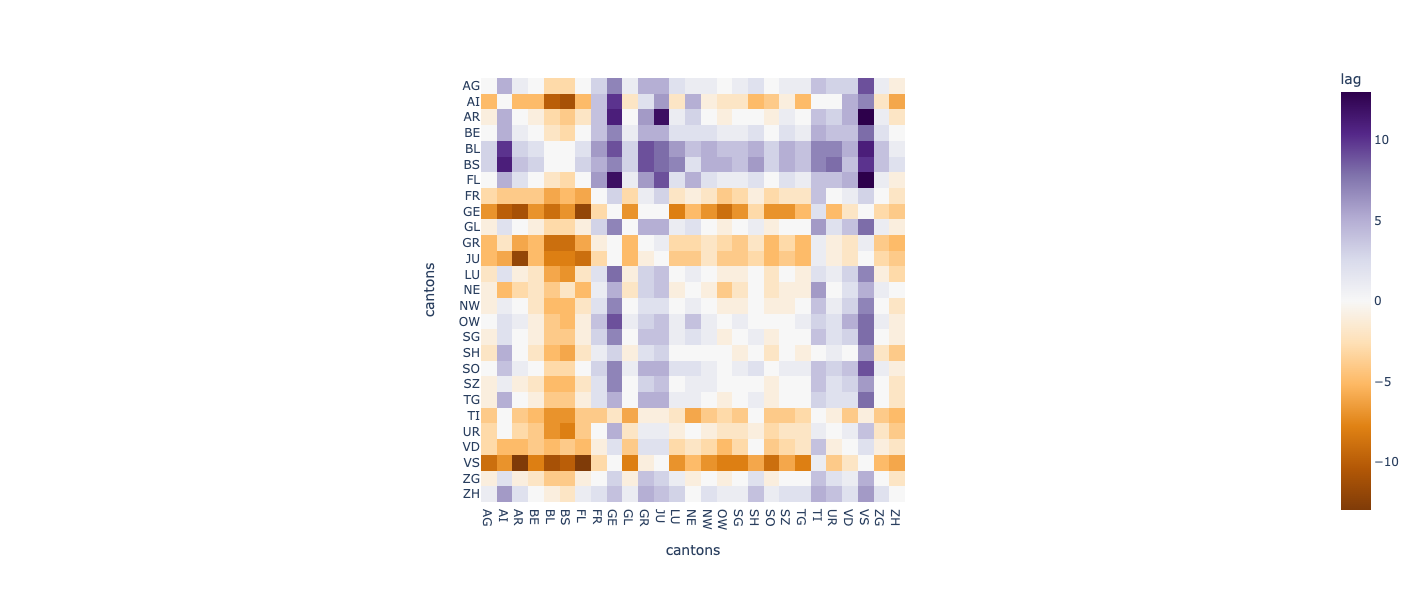

In [10]:
fig = px.imshow(lm,
                labels=dict(x="cantons", y="cantons", color="lag"),
                x=inc_canton.columns,
                y=inc_canton.columns,
                # title='Highest correlation lag',
                color_continuous_scale='puor'
          
         )
fig.update_layout(width=600,height=600)
fig.write_image('plots/canton_lag_matrix.png', scale=3)
fig.show()

Plotting Figure 6: The hierarchiqual clusterization of the cantons using the time series of cases.

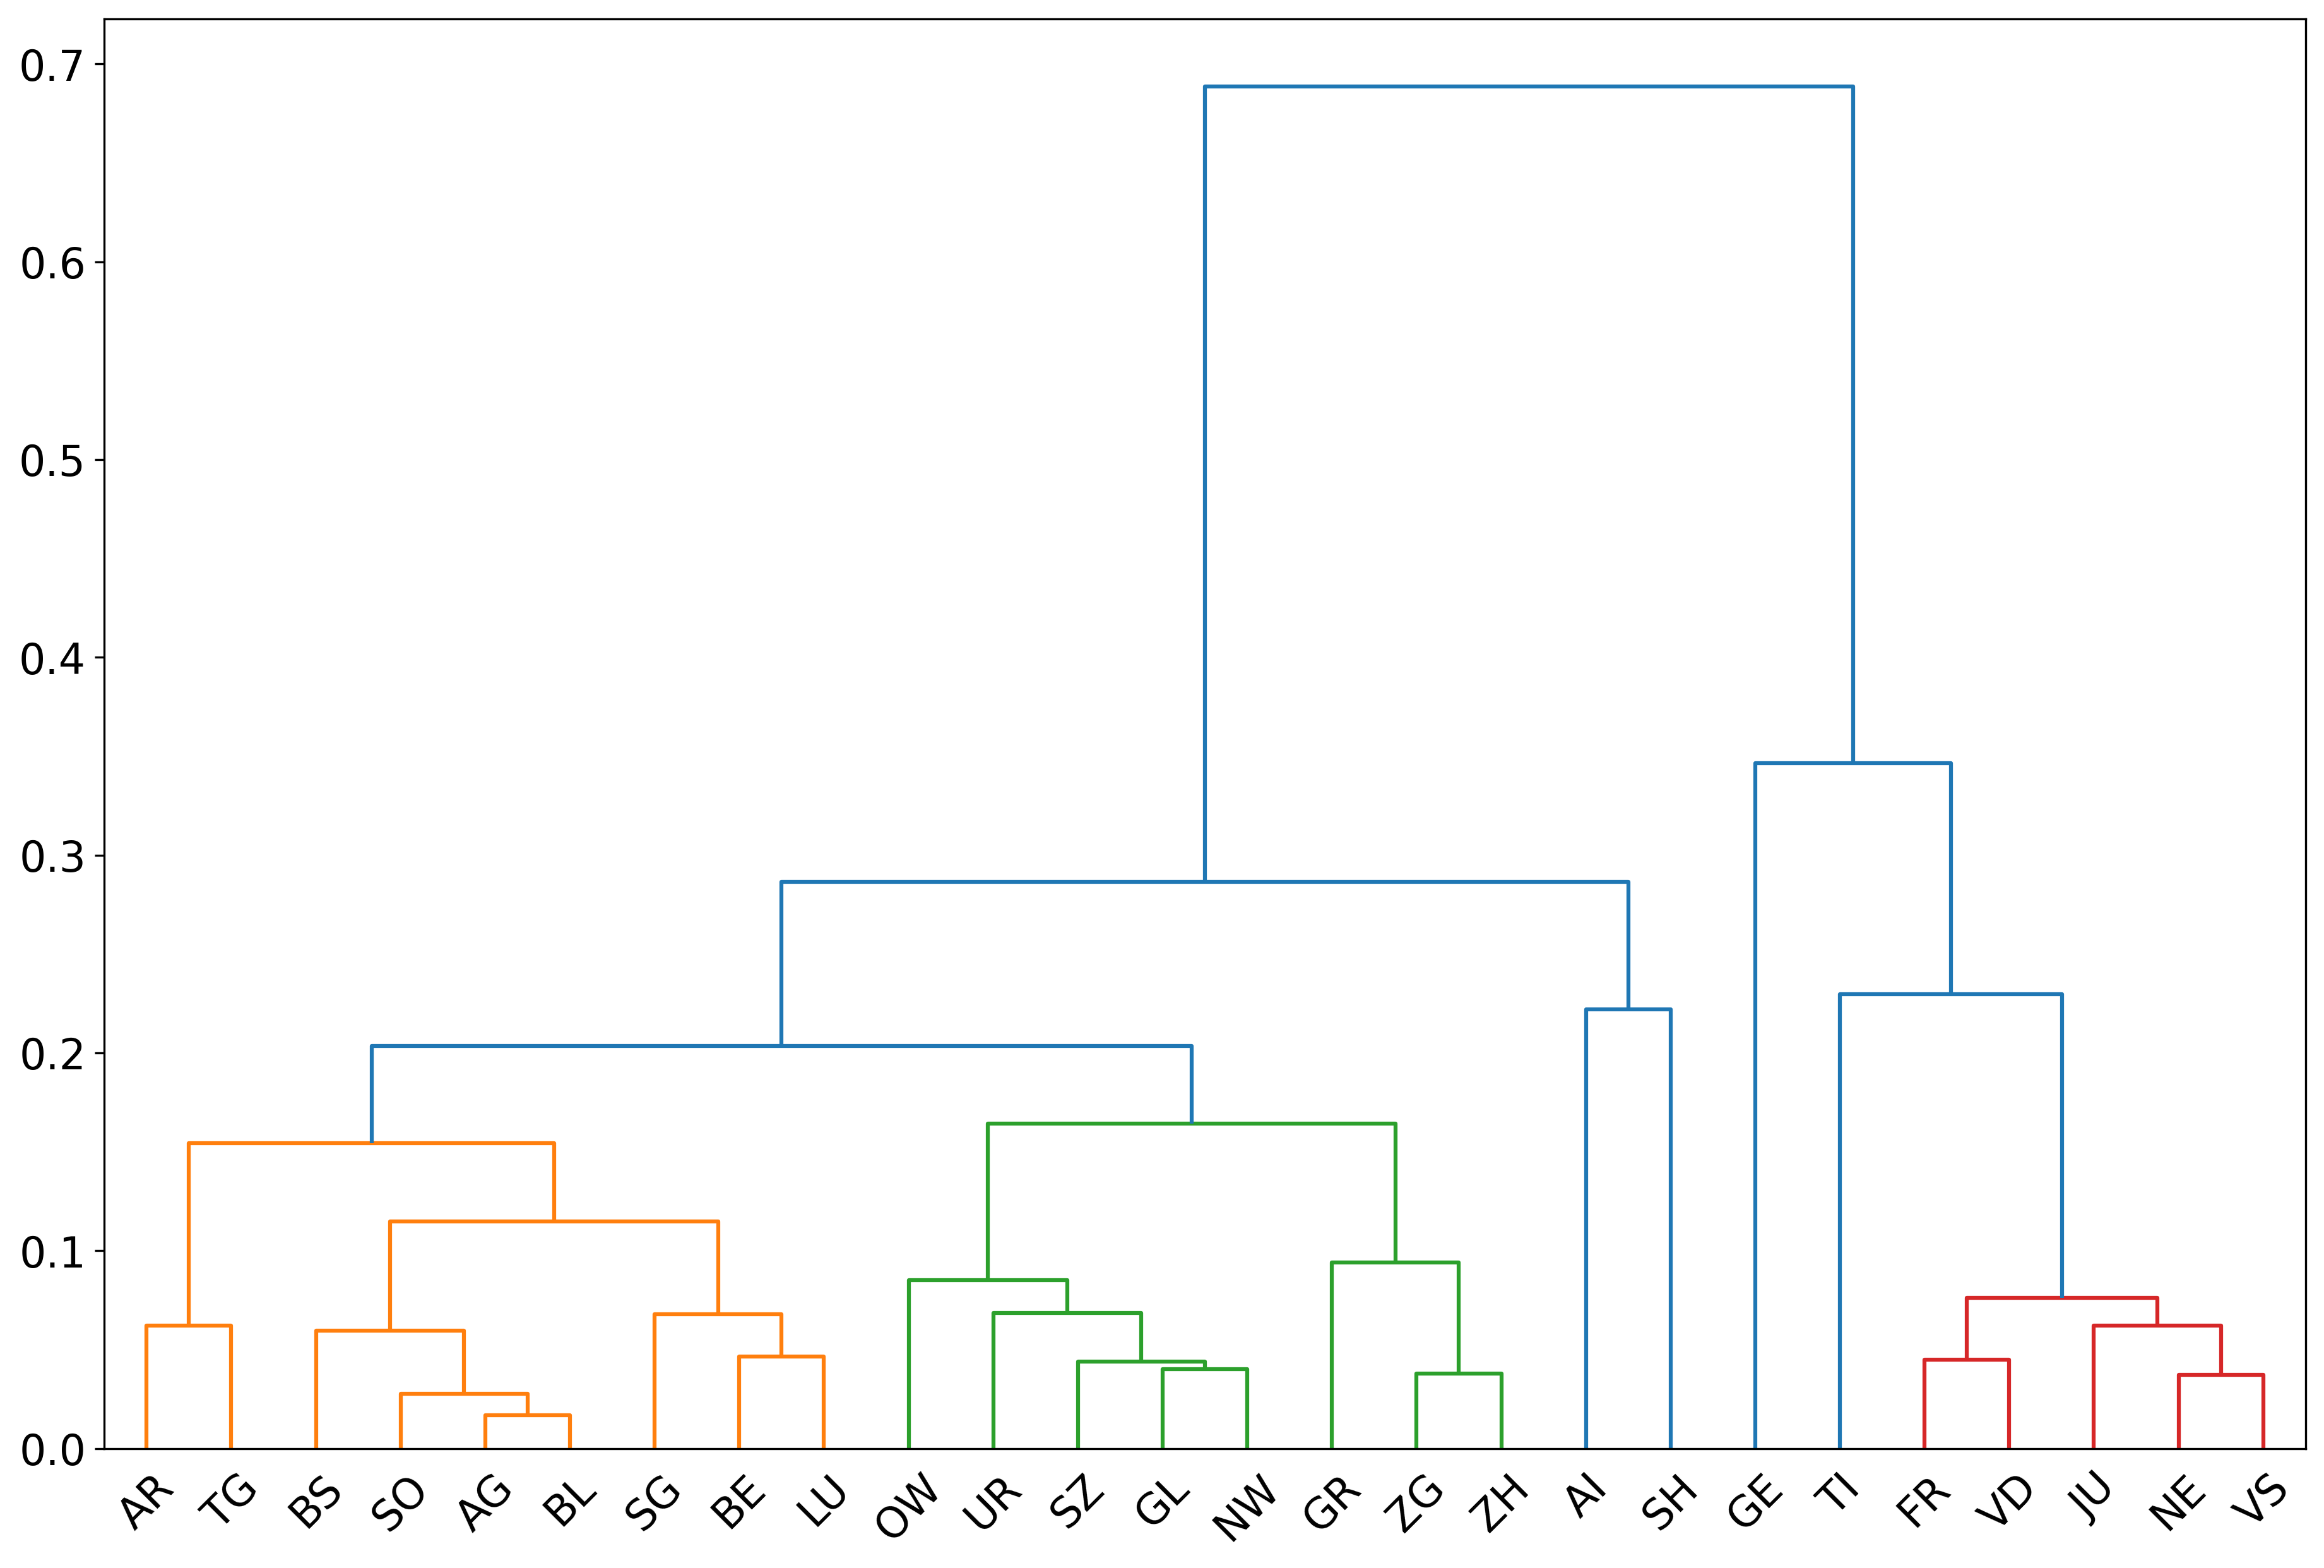

In [12]:
clusters = get_clusters_swiss(t=0.6, plot = True)